In [134]:
import numpy as np

In [135]:
def MAE(y, pred):
    return np.average(np.abs(y - pred))

In [136]:
def MSE(y, pred):
    return np.average((y - pred) ** 2)

def MSE_gradient(y, tx, w):
    return -1/tx.shape[0]*np.inner(tx.T, y - np.inner(tx, w))

In [137]:
def gradient_descent(y, tx, initial_w, max_iters, gamma, loss = MAE):
    B = initial_w
    tx = np.c_[np.ones((tx.shape[0], 1)), tx]
    for i in range(max_iters):

        B = B - gamma * np.gradient(np.abs(np.inner(np.zeros(2), tx)), B)
    return B

In [155]:
np.dot(X, X.T)

array([[ 2,  3,  4,  5],
       [ 3,  5,  6,  8],
       [ 4,  6,  8, 10],
       [ 5,  8, 10, 13]])

In [154]:
np.linalg.lstsq(X, y)

(array([2.09090909, 2.54545455]),
 array([3.27272727]),
 2,
 array([5.25371017, 0.63129192]))

In [160]:
def least_squares(y, tx):
    tx = np.c_[np.ones((tx.shape[0], 1)), tx]
    B = np.inner(np.dot(np.linalg.inv(np.dot(tx.T, tx)), tx.T), y)
    return B, MSE(y, np.inner(B, tx))

#np.linalg.lstsq(y, X)

least_squares(y, X)

(array([3., 1., 2.]), 0.0)

In [165]:
def ridge_loss(y, tx, lambda_, B):
    MSE(y, np.inner(tx, B)) + lambda_ * np.sum(B**2)

def ridge_regression(y, tx, lambda_):
    tx = np.c_[np.ones((tx.shape[0], 1)), tx]
    print(tx.shape)
    B = np.inner(np.dot(np.linalg.inv(np.dot(tx.T, tx) + lambda_/(2*tx.shape[0]) * np.eye(tx.shape[1])), tx.T), y)
    return B, MSE(y, np.inner(B, tx))


ridge_regression(y, X, 1)

(4, 3)


(array([2.44426794, 1.24966905, 2.05242256]), 0.02933628558344506)

In [140]:
# Linear regression, MSE Loss, Gradient descent

def gradient_descent(y, tx, initial_w, max_iters, gamma, loss = MAE):
    B = initial_w
    hist = []
    # adding offset
    tx = np.c_[np.ones((tx.shape[0], 1)), tx]
    
    for _ in range(max_iters):
        B -= gamma * MSE_gradient(y,tx,B)
        hist.append(np.linalg.norm(np.inner(tx.T, y - np.inner(tx, B))))

    return B, hist

In [141]:
# Test From scikit learn

from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_


array([1., 2.])

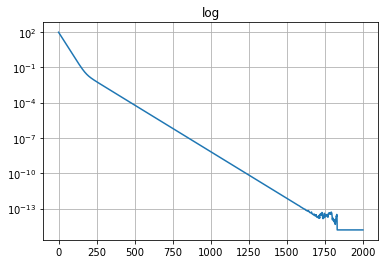

In [142]:
b , hist = gradient_descent(y, X, np.zeros(3), 2000, 0.25)
import matplotlib.pyplot as plt
plt.plot(hist)
plt.yscale('log')
plt.title('log')
plt.grid(True)

In [143]:
# Linear regression, MSE Loss, Gradient descent

def sgd(y, tx, initial_w, max_iters, gamma, loss = MAE, batch = 2):
    B = initial_w
    hist = []
    # adding offset
    tx = np.c_[np.ones((tx.shape[0], 1)), tx]
    
    for _ in range(max_iters):
        idx = np.random.randint(tx.shape[0], size=batch)
        tx_, y_ = tx[idx], y[idx]
        B -= gamma * MSE_gradient(y_,tx_,B)
        hist.append(np.linalg.norm(np.inner(tx_.T, y_ - np.inner(tx_, B))))

    return B, hist

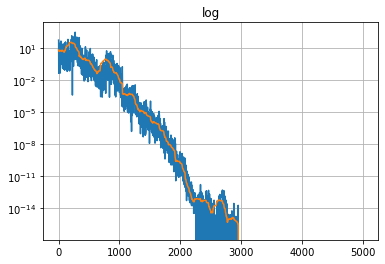

In [144]:
b , hist = sgd(y, X, np.zeros(3), 5000, 0.25)
import matplotlib.pyplot as plt
plt.plot(hist)
plt.plot(np.convolve(hist, np.ones(100)/100, mode='valid'))
plt.yscale('log')
plt.title('log')
plt.grid(True)